In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
np.random.seed(seed=132)

Now we will import the data from '1.txt', '2.txt', '3.txt' and will store them as dataframes in df1, df2, test_df respectively and will name the column as 'Text'. Also we will extract the sentiments(0/1) from the 'Text' columns and will store them in 'Prediction' column for both dataframes df1 and df2. 

In [3]:
# Import file from first file
df1 = pd.read_csv(r'C:\Users\Sony\Desktop\riverus\1.txt', sep='.   ', header=None)
df1.columns = ['Text']

sentiment = pd.Series([])

i=0;
for text in df1['Text']:
    sentiment[i] = text[-1:]
    i = i+1

In [4]:
df1['Prediction'] = sentiment

In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 2 columns):
Text          952 non-null object
Prediction    952 non-null object
dtypes: object(2)
memory usage: 15.0+ KB
None


In [6]:
df2 = pd.read_csv(r'C:\Users\Sony\Desktop\riverus\2.txt', sep='   .', header=None)
df2.columns = ['Text']

sentiment2 = pd.Series([])

j=0;
for text in df2['Text']:
    sentiment2[j] = text[:1]
    j = j+1

In [7]:
df2['Prediction'] = sentiment2

In [8]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 2 columns):
Text          7086 non-null object
Prediction    7086 non-null object
dtypes: object(2)
memory usage: 110.8+ KB
None


In [9]:
print (df2.describe())

                           Text Prediction
count                      7086       7086
unique                     1411          2
top     1\tI love Harry Potter.          1
freq                        167       3995


In [10]:
test_df = pd.read_csv(r'C:\Users\Sony\Desktop\riverus\3.txt', sep='  .')
test_df.columns = ['Text']

test_df['Text'] = test_df['Text'].str.lower()
test_df['Text']= test_df['Text'].map(lambda x: re.sub('[,\.!?"\t\d+]', '', x))

test_df = test_df.drop_duplicates()

In [11]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 931
Data columns (total 1 columns):
Text    919 non-null object
dtypes: object(1)
memory usage: 14.4+ KB
None


In [12]:
test_df.to_csv(r'C:\Users\Sony\Desktop\riverus\test_data.csv')

Now we will merge both the training dataframes df1 and df2 into one single dataframe named as df on which we will train our model. After merging we will also perform some text preprocessing like converting all alphabates to lower and including only alphabates in our 'Text' column. Also there are many duplicates rows in the dataframe, so we will drop all the duplicate rows and will shuffle all the rows to build a unbiased model.

In [13]:
df = pd.merge(df1, df2, how='outer')
df['Prediction'] = df['Prediction'].astype(int)


df['Text'] = df['Text'].str.lower()
df['Text']= df['Text'].map(lambda x: re.sub('[^a-zA-z\s]', '', x))


df = df.drop_duplicates()

In [14]:
from sklearn.utils import shuffle
df = shuffle(df)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176 entries, 4996 to 355
Data columns (total 2 columns):
Text          2176 non-null object
Prediction    2176 non-null int32
dtypes: int32(1), object(1)
memory usage: 42.5+ KB
None


In [16]:
df.to_csv(r'C:\Users\Sony\Desktop\riverus\train_data.csv')

In [17]:
x = df.Prediction.value_counts()
print(x)

1    1136
0    1040
Name: Prediction, dtype: int64


Text(0, 0.5, 'Counts')

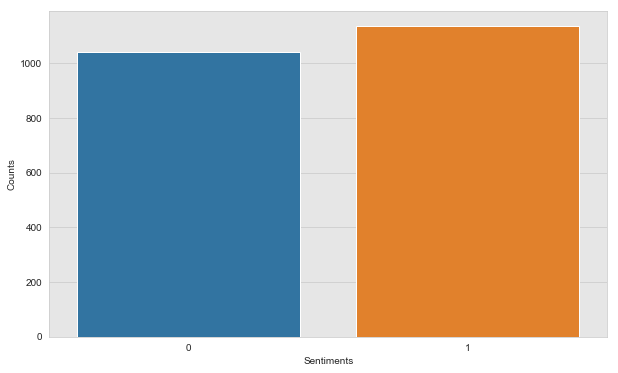

In [26]:
x = pd.DataFrame(x)
x['Rating'] = x.index
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(y='Prediction', x='Rating', data=x)
plt.xlabel('Sentiments')
plt.ylabel('Counts')

# import some Usefull libraries

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Here we will see the frequency of different words in our dataset, and we will notice that there are a large frequency of stopwords available in our dataset, so this is how this part of code help us in deciding whether we need to remove these stopwords or not for our further process.

In [33]:
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=0.001)
sparse_matrix = word_vectorizer.fit_transform(df['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
freq.sort_values('frequency', ascending=False)

,frequency
the,1488
and,796
is,605
of,542
to,472
was,432
it,396
potter,332
harry,329
vinci,323


Here after tokenisation will perform stemming on our 'Text' column and will join those tokens again and will store that in a new column named 'tokezines_sents'. We will also perform train test split our training data and will transform our X_train_df and X_test_df to a matrix of token counts.

In [34]:
df['tokezines_sents'] = df.apply(lambda x: nltk.word_tokenize(x['Text']),axis=1)
stemmer = SnowballStemmer('english')
df['tokezines_sents'] = df['tokezines_sents'].apply(lambda x: [stemmer.stem(y) for y in x])
df['tokezines_sents'] = df['tokezines_sents'].apply(lambda x: ' '.join(x))

X = df['tokezines_sents']
y=df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=53)

vectorizer = CountVectorizer(stop_words='english')

In [35]:
X_train_df = vectorizer.fit_transform(X_train)
X_test_df = vectorizer.transform(X_test)

Now we will build our 1st model using LogisticRegression as a classifier and will also perform gridsearch to choose best parameters to get a better model. And after that we will fit our model on X_test and will calculate the accuracy and classification matrix.

In [36]:
# Logistic regression

clf1 = LogisticRegression()

params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}

model = GridSearchCV(clf1, params, cv=10)

model.fit(X_train_df, y_train)
y_pred = model.predict(X_test_df)

In [37]:
print(model.best_params_)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'C': 1, 'class_weight': None, 'penalty': 'l2'}
0.8698315467075038
[[253  44]
 [ 41 315]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       297
           1       0.88      0.88      0.88       356

   micro avg       0.87      0.87      0.87       653
   macro avg       0.87      0.87      0.87       653
weighted avg       0.87      0.87      0.87       653



After that our second model will be build using MultinomialNB as a classifier and best alpha is choosed using gridsearch, and accuracy and classification matrix is calculated.

In [38]:
clf2 = MultinomialNB()

params2 = {'alpha':[0.01,0.1,1,10,100]}

model2 = GridSearchCV(clf2, params2, cv=10)

model2.fit(X_train_df, y_train)
y_pred2 = model2.predict(X_test_df)

In [39]:
print(model2.best_params_)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

{'alpha': 1}
0.889739663093415
[[261  36]
 [ 36 320]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       297
           1       0.90      0.90      0.90       356

   micro avg       0.89      0.89      0.89       653
   macro avg       0.89      0.89      0.89       653
weighted avg       0.89      0.89      0.89       653



Here we can see out of the above two model, model2 is performing better and giving us a higher accuracy. So we will perform some preprocessing on our test_df and will predict the sentiments using model2 which is using Naive Bayes's MultinomialNB classifier. And before predicting we will also train the same model for complete training dataset.

In [40]:
test_df['tokezines_sents'] = test_df.apply(lambda x: nltk.word_tokenize(x['Text']),axis=1)
test_df['tokezines_sents'] = test_df['tokezines_sents'].apply(lambda x: [stemmer.stem(y) for y in x])
test_df['tokezines_sents'] = test_df['tokezines_sents'].apply(lambda x: ' '.join(x))

X_final = test_df['tokezines_sents']

X_dy = vectorizer.fit_transform(X)
X_final_test = vectorizer.transform(X_final)

model2.fit(X_dy, y)
final_prediction = model2.predict(X_final_test)

In [41]:
test_df['Prediction'] = final_prediction.tolist()
test_df = test_df.drop('tokezines_sents', axis=1)

In [42]:
test_df.head()

,Text,Prediction
0,i exchanged the sony ericson za for this and i...,1
1,oh and i forgot to also mention the weird colo...,1
2,verizon tech support walked my through a few p...,0
3,better than you'd expect,0
4,this is a great little item,1


In [43]:
test_df.to_csv(r'C:\Users\Sony\Desktop\riverus\Prediction_data.csv')